In [112]:
#Integrantes do grupo
# Rama Alvim Sales Schiavo - alvimrama@gmail.com
# Rithie Natan Carvalhaes Prado - rithienatan@gmail.com
# Ian Rodrigues dos Reis Paixão - ian.paixao@sga.pucminas.br
# Luiz Gustavo Bragança dos Santos - luiz.braganca@sga.pucminas.br
# Guilherme de Andrade Moura - guileon64@gmail.com

import numpy as np
import pandas as pd # ler csv
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

import missingno as msno #separa od dados faltantes
import os
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #para usar hiper parametros que a cris pediu
import graphviz


Previsão de melhor estratégia

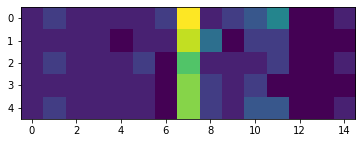

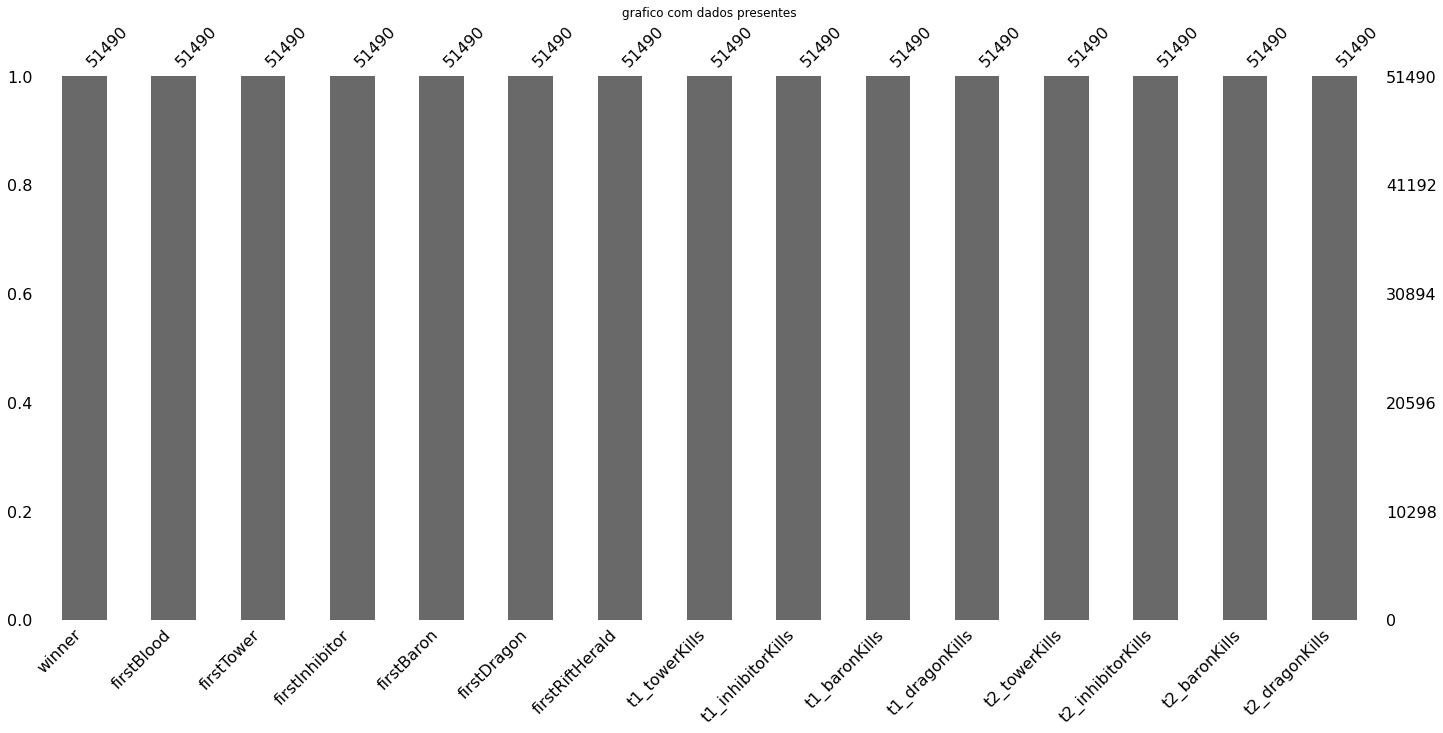

In [113]:

# print(os.listdta dir("./"))
dados_csv=pd.read_csv("games.csv")



data=dados_csv[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
       ]]


#tratar faltantes
# data.drop([524,839,867,5325,5340,6472,7408,7430,7570,7711,7874,7900,3858,4031,4467,4551,4646,4696,4897,4907,5002,5027,1241,1347,1452,1712,1962,2681,2799,2837,2960,3010,3093,3234,3325,3534,3634,3659,3747,3806,3848],inplace=True)
data=data.reset_index()
data.drop(["index"],axis=1,inplace=True)


#carrega cabeçalho no grafico
plt.imshow(data.head())

plt.show() # mostra as primeiro 5 entradas no dataset
num_missing = (data == 0).sum()
# print(num_missing)
msno.bar(data)
# print(dir(msno))
plt.title('grafico com dados presentes')
plt.show()

first_team=data[data.winner==1]
# print(len(first_team))
second_team=data[data.winner==2]
# print(len(second_team))


y = data["winner"].values
x = data.drop(["winner"],axis=1)

#separando os itens de teste.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=5,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [114]:
grid_decision_tree.fit(x_train,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(x_train,y_train)
print("score:", dt2.score(x_test,y_test))

dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=x.columns,class_names=["1","2"],
                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

best score:  0.9673167858526822
best param:  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
score: 0.9693791674758853


Arvore com atributos mais reelevantes--> estratégia

In [115]:
graph
with open('./graph.svg', 'w') as f:
    f.write(graph._repr_svg_())


In [116]:
predicted_values = dt2.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
cr=classification_report(y_test,predicted_values)
print('Classification report : \n',cr)



Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97      7877
           2       0.97      0.97      0.97      7570

    accuracy                           0.97     15447
   macro avg       0.97      0.97      0.97     15447
weighted avg       0.97      0.97      0.97     15447

